In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 50; m = 3
iterations = 100

# X_base = np.random.uniform(size = (N, m))
# X_base_blind = np.ones((N, m))
c = np.zeros((iterations + 1, m))

e = np.zeros((iterations, N, m))
c[0] = np.array([1, 1, 1])

def dilute(e):
    return np.sum(e ** (1) + 1)

In [59]:
def welfare(X_base, blind = False):

    payoff = np.zeros((iterations, N))

    if not blind:
        for t in range(iterations):
            for i in range(N):
                e[t, i] = c[t] * X_base[i] / np.linalg.norm(c[t] * X_base[i])
                # payoff[t, i] = 0
                
            for i in range(N):
                for j in range(m):
                    payoff[t, i] += c0[j] * e[t, i, j] * X_base[i, j] / dilute(e[t].transpose()[j])

            for j in range(m):
                c[t + 1, j] = c0[j] / dilute(e[t].transpose()[j])

    else:
        X_base_blind = np.ones((N, m))
        for t in range(iterations):
            for i in range(N):
                e[t, i] = c[t] * X_base_blind[i] / np.linalg.norm(c[t] * X_base_blind[i])
                # payoff[t, i] = 0
                
            for i in range(N):
                for j in range(m):
                    payoff[t, i] += c0[j] * e[t, i, j] * X_base[i, j] / dilute(e[t].transpose()[j])

            for j in range(m):
                c[t + 1, j] = c0[j] / dilute(e[t].transpose()[j])
    return payoff


In [60]:
ind = True

for _ in range(100):
    c0 = np.random.uniform(size = m)
    X = np.random.uniform(size = (N, m))
    ind = ind and np.all(welfare(X)[-1] >= welfare(X, blind = True)[-1])

ind

True

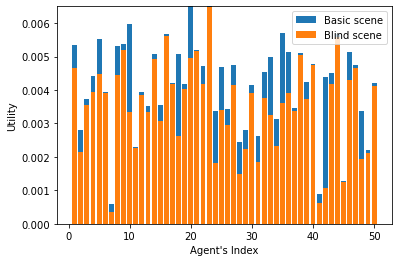

In [49]:
X = np.random.uniform(size = (N, m))
plt.bar(np.arange(N)+1, welfare(X)[-1], label = "Basic scene")
plt.bar(np.arange(N)+1, welfare(X, blind = True)[-1], label = "Blind scene")
plt.xlabel("Agent's Index")
plt.ylabel("Utility")
plt.ylim((0, 0.0065))
plt.legend()
plt.show()